Exploratory analysis of Twitter and Facebook Data

In [4]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np

%matplotlib inline

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [19]:
df_raw_tweet = pd.read_csv('./Datasets/Twitter_Training_Data.csv', encoding='latin1')
print (df_raw_tweet.head())

       Tweet id                                    Tweet_permalink  \
0  9.799020e+17  https://twitter.com/tippingpoint/status/979902...   
1  9.798700e+17  https://twitter.com/tippingpoint/status/979869...   
2  9.798630e+17  https://twitter.com/tippingpoint/status/979862...   
3  9.797680e+17  https://twitter.com/tippingpoint/status/979767...   
4  9.794570e+17  https://twitter.com/tippingpoint/status/979457...   

                                          Tweet_text        Attribute  \
0  Thank you to our #TippingPointGrantees! It's a...  Event Promotion   
1  .@NewTeacherCtr's newly released program stand...        Education   
2  The majority of our chronically homeless neigh...     Homelessness   
3  Congratulations to AD-10 Woman of the Year Luc...      Immigration   
4  Thanks for the shout out @New_Sincerity! Our i...       Nonprofits   

                     time  impressions  engagements  url clicks  
0  2018-03-31 02:05 +0000          980            9           5  
1  2018-

In [20]:
df_raw_tweet.count()

Tweet id           100
Tweet_permalink    100
Tweet_text         100
Attribute          100
time               100
impressions        100
engagements        100
url clicks         100
dtype: int64

In [21]:
print(df_raw_tweet.describe())

           Tweet id   impressions  engagements  url clicks
count  1.000000e+02    100.000000   100.000000  100.000000
mean   9.701462e+17   1575.740000    17.490000    2.890000
std    6.782459e+15   2147.196733    29.522631    4.636036
min    9.581530e+17     50.000000     0.000000    0.000000
25%    9.639050e+17    865.000000     5.000000    0.000000
50%    9.711950e+17   1146.500000    10.500000    1.000000
75%    9.765255e+17   1485.250000    20.000000    4.250000
max    9.799020e+17  17606.000000   273.000000   23.000000


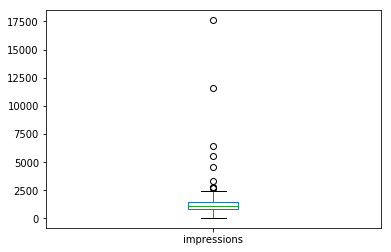

In [23]:
df_raw_tweet['impressions'].plot(kind='box')

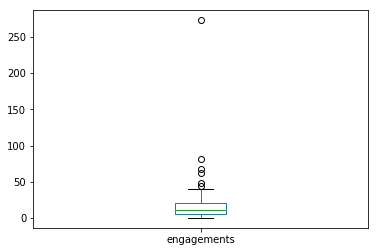

In [25]:
df_raw_tweet['engagements'].plot(kind='box')

In [28]:
df_raw_tweet.hist
pl.show

<function matplotlib.pyplot.show>

In [29]:
df_raw_tweet.corr()

,Tweet id,impressions,engagements,url clicks
Tweet id,1.000000,0.053213,0.138286,0.194190
impressions,0.053213,1.000000,0.882013,0.634864
engagements,0.138286,0.882013,1.000000,0.605641
url clicks,0.194190,0.634864,0.605641,1.000000
